In [2]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlwt

# b(1) explor dataset

The data set has 5 sheets, but the data in each sheet is the same.
In total, it has 5 columns and 9569 rows.

Columns means different attributes: Temperature(AT), Ambient Pressure(AP), Relative Humidity(RH)and Exhaust Vacuum(V). Energy output(PE) is been predicted.

Each row represents the data in one hour.

# b(2) scatterplots of the dataset

In [3]:
file = pd.read_excel("Folds5x2_pp.xlsx", sheet_name="Sheet1")
file

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


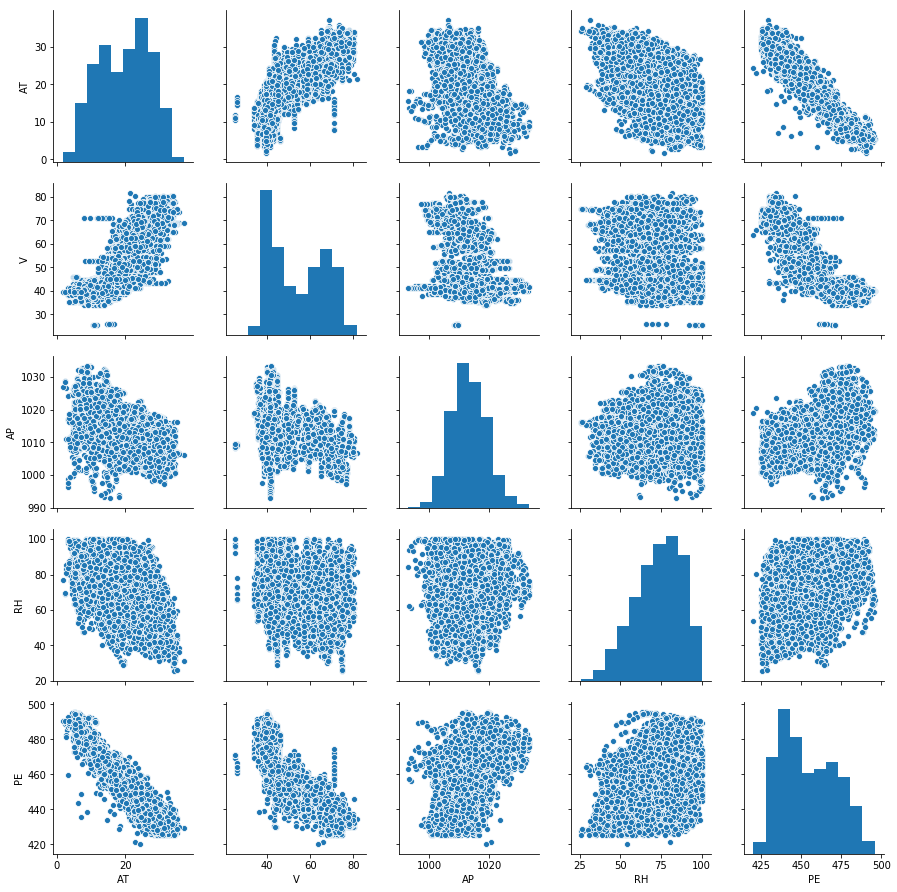

In [4]:
sb.pairplot(file)

From the scatterplots, it seems that AT and V have positive correlation, when AP goes high, V goes high

And PE seems to have nagative correlation with AT and V

# b(3) statistic table

In [5]:
f = xlwt.Workbook()
sheet1 = f.add_sheet('sheet1',cell_overwrite_ok=True)
row0 = ["feature","mean", "median", "range", "1quartile", "3quartile", "interquartile"]
colum0 = ["AT","V","AP","RH","PE"]

for i in range(0,len(row0)):
    sheet1.write(0,i,row0[i])
for i in range(0,len(colum0)):
    sheet1.write(i+1,0,colum0[i])

for i in range(0, 5):
    stic_data = pd.read_excel("Folds5x2_pp.xlsx", sheet_name="Sheet1", usecols=[i])
    li = stic_data.values.tolist()
    result = []
    for s_li in li:

        result.append(s_li[0])
    
    at_mean = np.mean(result)
    at_median = np.median(result)
    at_range = max(result) - min(result)
    at_1quartile = np.percentile(result, 25)
    at_3quartile = np.percentile(result, 75)
    at_interquartile = at_3quartile - at_1quartile
    row = [at_mean,at_median,at_range,at_1quartile,at_3quartile,at_interquartile]

    for t in range(0, len(row)):
        sheet1.write(i+1, t+1, row[t])
f.save('table.xls')

In [6]:
statistic_table = pd.read_excel("table.xls")
statistic_table

,feature,mean,median,range,1quartile,3quartile,interquartile
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


# c. linear regression (AT)

Coefficients: -2.171319958517795
MSE: 29.431702011093517
R^2: 0.8989475964148236


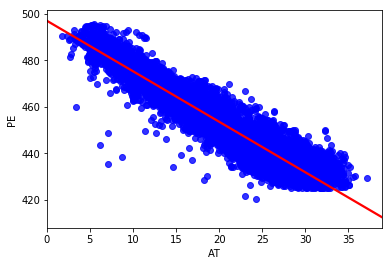

In [7]:
# Use guide from:https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = file['AT']
X = np.c_[np.ones(x.shape),x] 
y = file['PE']
reg = LinearRegression().fit(X, y)
coef_arr = []
coef_arr.append(reg.coef_[1])
print('Coefficients:', reg.coef_[1])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

sb.regplot(x='AT', y='PE', data=file, color='blue', line_kws={'color':'red'})


Coefficients: -1.1681351265557096
MSE: 70.91465103018828
R^2: 0.7565177870683979


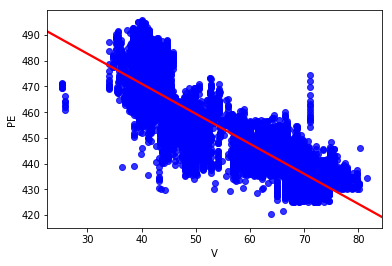

In [8]:
x = file['V']
X = np.c_[np.ones(x.shape),x] 
y = file['PE']
reg = LinearRegression().fit(X, y)
coef_arr.append(reg.coef_[1])
print('Coefficients:', reg.coef_[1])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

sb.regplot(x='V', y='PE', data=file, color='blue', line_kws={'color':'red'})

Coefficients: 1.4898716733991137
MSE: 212.97249983312628
R^2: 0.2687686564110675


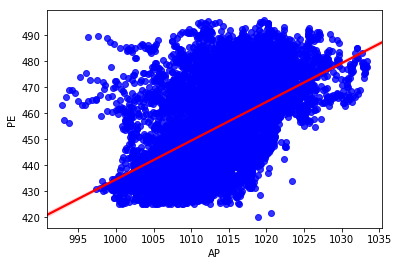

In [9]:
#%%
x = file['AP']
X = np.c_[np.ones(x.shape),x] 
y = file['PE']
reg = LinearRegression().fit(X, y)
coef_arr.append(reg.coef_[1])
print('Coefficients:', reg.coef_[1])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

sb.regplot(x='AP', y='PE', data=file, color='blue', line_kws={'color':'red'})

Coefficients: 0.4556501022629806
MSE: 246.99922809296348
R^2: 0.15193944023117578


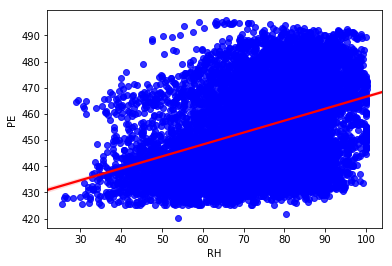

In [10]:
x = file['RH']
X = np.c_[np.ones(x.shape),x] 
y = file['PE']
reg = LinearRegression().fit(X, y)
coef_arr.append(reg.coef_[1])
print('Coefficients:', reg.coef_[1])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

sb.regplot(x='RH', y='PE', data=file, color='blue', line_kws={'color':'red'})

From above 4 tests, when we choose AP or V as the predictor, the mean square error and R-square are acceptable



However, when it comes to AP and RH, the MSE becomes very high which means the linear regression is not a reasonable prediction model in these cases



In conclusion, AP and V are better fits to linear regression model. 

From the plots, we can see in AT's plot, there is no good outliers.

In V's plot, V less than 30 can be the outlier

In AP's plot, AP less than 998 can be the outlier

In RH's plot, RH less than 30 can be the outlier

# d. multiple regression model

In [11]:
x = file[['AT','V','AP','RH']]
X = np.c_[np.ones(x.shape),x] 
y = file['PE']
reg = LinearRegression().fit(X, y)
coef_arr1 = []
coef_arr1.append(reg.coef_[4])
coef_arr1.append(reg.coef_[5])
coef_arr1.append(reg.coef_[6])
coef_arr1.append(reg.coef_[7])

print('AT-Coefficients:', reg.coef_[4])
print('V-Coefficients:', reg.coef_[5])
print('AP-Coefficients:', reg.coef_[6])
print('RH-Coefficients:', reg.coef_[7])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

AT-Coefficients: -1.977513106635396
V-Coefficients: -0.23391642258249973
AP-Coefficients: 0.062082943780855604
RH-Coefficients: -0.1580541029164133
MSE: 20.767397532535018
R^2: 0.9286960898122536


In all the tests before, only when we us all perameters as the predictor, the R^2 score will be more than 90%

To get the p-value and decide which predictor can reject H0, we use OLS function in statsmodels

In [12]:
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X)
table = model.fit()
print(table.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:46:16   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In the summary table above, we can see that all predictor's p-value is less than 0.05, which means all of them can reject H0

# e. plot the coefficience in c and d

In [13]:
coef_arr

[-2.171319958517795,
 -1.1681351265557096,
 1.4898716733991137,
 0.4556501022629806]

In [14]:
coef_arr1

[-1.977513106635396,
 -0.23391642258249973,
 0.062082943780855604,
 -0.1580541029164133]

Text(0,0.5,'MLR')

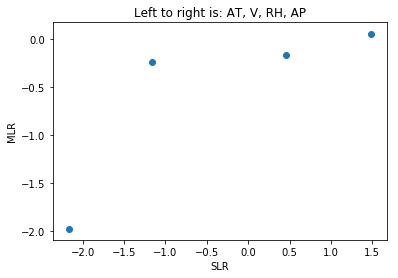

In [15]:
plt.scatter(coef_arr, coef_arr1)
plt.title("Left to right is: AT, V, RH, AP")
plt.xlabel("SLR")
plt.ylabel("MLR")

# f. use polynomial data for each X in regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
x = file[['AT']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ["AT0", "AT1", "AT2", "AT3"])
X = np.c_[np.ones(X_poly.shape),X_poly] 
y = file['PE']
reg = LinearRegression().fit(X,y)

print('AT0-Coefficients:', reg.coef_[4])
print('AT1-Coefficients:', reg.coef_[5])
print('AT2-Coefficients:', reg.coef_[6])
print('AT3-Coefficients:', reg.coef_[7])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

AT0-Coefficients: 0.0
AT1-Coefficients: -0.6103457083127051
AT2-Coefficients: -0.12513817739941477
AT3-Coefficients: 0.0026748519468273654
MSE: 25.66433968146689
R^2: 0.9118826627742724


In [18]:
x = file[['V']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ["V0", "V1", "V2", "V3"])
X = np.c_[np.ones(X_poly.shape),X_poly] 
y = file['PE']
reg = LinearRegression().fit(X,y)

print('V0-Coefficients:', reg.coef_[4])
print('V1-Coefficients:', reg.coef_[5])
print('V2-Coefficients:', reg.coef_[6])
print('V3-Coefficients:', reg.coef_[7])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

V0-Coefficients: 0.0
V1-Coefficients: -2.144377322425607
V2-Coefficients: -0.0027122848954216896
V3-Coefficients: 0.0001343571097217528
MSE: 65.52527085562208
R^2: 0.7750219775589422


In [19]:
x = file[['AP']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ["AP0", "AP1", "AP2", "AP3"])
X = np.c_[np.ones(X_poly.shape),X_poly] 
y = file['PE']
reg = LinearRegression().fit(X,y)

print('AP0-Coefficients:', reg.coef_[4])
print('AP1-Coefficients:', reg.coef_[5])
print('AP2-Coefficients:', reg.coef_[6])
print('AP3-Coefficients:', reg.coef_[7])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

AP0-Coefficients: 0.0
AP1-Coefficients: -15460.865690202158
AP2-Coefficients: 15.216252118723322
AP3-Coefficients: -0.004991159794811349
MSE: 204.59178265374356
R^2: 0.29754346577904056


In [20]:
x = file[['RH']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ["RH0", "RH1", "RH2", "RH3"])
X = np.c_[np.ones(X_poly.shape),X_poly] 
y = file['PE']
reg = LinearRegression().fit(X,y)

print('RH0-Coefficients:', reg.coef_[4])
print('RH1-Coefficients:', reg.coef_[5])
print('RH2-Coefficients:', reg.coef_[6])
print('RH3-Coefficients:', reg.coef_[7])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

RH0-Coefficients: 0.0
RH1-Coefficients: -1.7292113077309659
RH2-Coefficients: 0.03214517214048765
RH3-Coefficients: -0.0001521879688143601
MSE: 246.47407323169548
R^2: 0.15374253544345973


From the results before, only AT-PE model has evidence for nonlinear association

# g. use polynomial for all predictors 

In [21]:
x = file[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(interaction_only=True)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ['0','AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH'])
X = np.c_[np.ones(X_poly.shape),X_poly] 
y = file['PE']
reg = LinearRegression().fit(X,y)

print('AT-Coefficients:', reg.coef_[12])
print('V-Coefficients:', reg.coef_[13])
print('AP-Coefficients:', reg.coef_[14])
print('RH-Coefficients:', reg.coef_[15])
print('AT*V-Coefficients:', reg.coef_[16])
print('AT*AP-Coefficients:', reg.coef_[17])
print('AT*RH-Coefficients:', reg.coef_[18])
print('V*AP-Coefficients:', reg.coef_[19])
print('V*RH-Coefficients:', reg.coef_[20])
print('AP*RH-Coefficients:', reg.coef_[21])
print('MSE:', mean_squared_error(y,reg.predict(X)))
print('R^2:', r2_score(y, reg.predict(X)))

AT-Coefficients: -4.347014120049112
V-Coefficients: -7.674857633972712
AP-Coefficients: -0.15235464174064056
RH-Coefficients: 1.5709070480966785
AT*V-Coefficients: 0.02097092313516443
AT*AP-Coefficients: 0.0017590451820455044
AT*RH-Coefficients: -0.005230353640512311
V*AP-Coefficients: 0.006812354325753532
V*RH-Coefficients: 0.000838633178684376
AP*RH-Coefficients: -0.0016117989440651494
MSE: 18.551068885394688
R^2: 0.9363057529178326


 From the test result, MSE is really low and R^2 is higher than 90%


 There is evidence of association of interactions of predictors with the response


# h1. 70% training data, multiple regression

In [22]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(file[['AT', 'V', 'AP', 'RH']], file['PE'], test_size = 0.3)
X_train_1 = np.c_[np.ones(x_train_1.shape),x_train_1] 
X_test_1 = np.c_[np.ones(x_test_1.shape),x_test_1]
reg = LinearRegression().fit(X_train_1, y_train_1)

test_error = mean_squared_error(y_test_1, reg.predict(X_test_1))
train_error = mean_squared_error(y_train_1, reg.predict(X_train_1))

print("test MSE: ", test_error)
print("train MSE: ", train_error)

test MSE:  21.03165470267164
train MSE:  20.657870478909928


# h2. Involve all possible interaction terms and quadratic nonlinearities

Remove insignificant variables using p-value

In [24]:
x = file[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly_reg.fit_transform(x)
X_poly = pd.DataFrame(X_poly, columns = ['1','AT', 'V', 'AP', 'RH', 'AT*AT', 'AT*V', 'AT*AP', 'AT*RH', 'V*V', 'V*AP', 'V*RH', 'AP*AP', 'AP*RH', 'RH*RH'])
X = np.c_[np.ones(X_poly.shape),X_poly]
y = file['PE']

# As we set in the dataframe, we can build a same list to check all those features one by one
# use guide from: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression


In [25]:
arr_toTest = ['1', 'AT*AT', 'AT*V', 'AT*AP', 'AT*RH', 'V*V', 'V*AP', 'V*RH', 'AP*AP', 'AP*RH', 'RH*RH']
insignificant_arr = ['1']

while(len(insignificant_arr) != 0):
    arr_toTest = list(set(arr_toTest) - set(insignificant_arr))
    x_train, x_test, y_train, y_test = train_test_split(X_poly[arr_toTest], y, test_size = 0.3)

    # to get p-value of linearegression
    x_test = sm.add_constant(x_test)
    x_train = sm.add_constant(x_train)
    model = sm.OLS(y_train, x_train)
    table = model.fit()
    insignificant_arr = [key for key, val in table.pvalues.items() if val>0.05]
print(table.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:08:16   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6688   BIC:                         3.858e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.6654      5.622     79.806      0.0

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_poly[arr_toTest], y, test_size = 0.3)
X_train = np.c_[np.ones(x_train.shape),x_train] 
X_test = np.c_[np.ones(x_test.shape),x_test]
reg = LinearRegression().fit(X_train, y_train)
test_error = mean_squared_error(y_test, reg.predict(X_test))
train_error = mean_squared_error(y_train, reg.predict(X_train))
print("test MSE: ", test_error)
print("train MSE: ", train_error)

test MSE:  19.169356754809776
train MSE:  18.51359801544398


From the 2 test above, we have the following finding:

When we remove those insignificant variables, both test and train MSE become lower

This is to say, the second model performance better than the first one in this dataset

# i1. KNN Regression with row data

In [30]:
# similiar with hw1
from sklearn.neighbors import KNeighborsRegressor
K = np.arange(1,101)
testing_error_dict = {}
testing_error_array = []
training_error_array = []

for k in K:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_1, y_train_1)

    testing_error = mean_squared_error(y_test_1, knn.predict(x_test_1))
    training_error = mean_squared_error(y_train_1, knn.predict(x_train_1))
    
    testing_error_array.append(testing_error)
    training_error_array.append(training_error)
    testing_error_dict.update({k:testing_error})

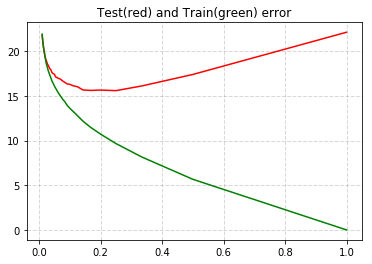

In [31]:
plt.title("Test(red) and Train(green) error")
K = [(1/k) for k in range(1,101)]
plt.plot(K, testing_error_array, color="red")
plt.plot(K, training_error_array, color="green")
plt.grid(color='grey', linestyle='--', linewidth=1,alpha=0.3)

In [32]:
# get the best k in KNN regression
testing_error_dict
print("The best K in this model is", min(testing_error_dict, key=testing_error_dict.get))
print("The lowest test error is", min(testing_error_dict.values()))

The best K in this model is 4
The lowest test error is 15.599340854667364


# i2. knn regression with normalized data

In [33]:
from sklearn.preprocessing import Normalizer
X_test_1 = Normalizer().fit_transform(x_test_1)
X_train_1 = Normalizer().fit_transform(x_train_1)

K = np.arange(1,101)
testing_error_dict = {}
testing_error_array = []
training_error_array = []

for k in K:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_1, y_train_1)

    testing_error = mean_squared_error(y_test_1, knn.predict(X_test_1))
    training_error = mean_squared_error(y_train_1, knn.predict(X_train_1))

    testing_error_array.append(testing_error)
    training_error_array.append(training_error)
    testing_error_dict.update({k:testing_error})

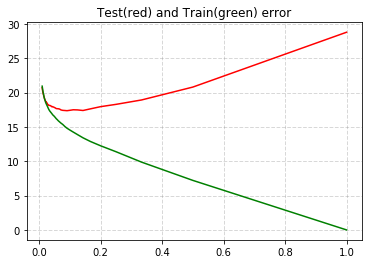

In [34]:
# plot training and test error
plt.title("Test(red) and Train(green) error")
K = [(1/k) for k in range(1,101)]
plt.plot(K, testing_error_array, color="red")
plt.plot(K, training_error_array, color="green")
plt.grid(color='grey', linestyle='--', linewidth=1,alpha=0.3)

In [35]:
testing_error_dict
print("The best K in this model is", min(testing_error_dict, key=testing_error_dict.get))
print("The lowest test error is", min(testing_error_dict.values()))

The best K in this model is 11
The lowest test error is 17.362680823049526


# j. Compair linear regression and KNN regression

In my test, the best linear regression test error occurs when we use polynomial to all predictors. 

The best KNN regression occurs when we use the row data to do the prediction. And both row and normalized data perform better than all linear regression model.

As my conclusion, it is better to use KNN regression on this dataset.

# ISLR 2.4.1

1. When n is large, p is small, the degree of freedom is large (n-p-1).
    
   In this condition, a more flexable model can reduce the MES, witch is what we want

2. Totally different to the first question, now the degree of freedom is small.

    In this case, a flexable model will be worse for the prediction

3. When the predictor and response is non-linear, we can choose a flexable model because it is not that eazy to get over-fitted.

4. On common conditions, when a model is flexable, it has high var and small bias.

    Which is to say we can choose a model that is not flexable to get a better result.

# ISLR 2.4.7

1. We use eucilidean distance = sqrt[(0-x1)^2 + (0-x2)^2 + (0-x3)^2]

    ob1 = 3, ob2 = 2, ob3 = sqrt(10), ob4 = sqrt(5), ob5 = sqrt(2),ob6 = sqrt(3)

2. k=1, we choose the closest point to predict, which is ob5

     So the input point should be green

3. k=3, we choose 3 closest points to predict, which are ob2, ob5 and ob6

     As we have 2 red in these 3 points, so we predict the input point as red

4. from the figure2.16 in the book, we can see that when k is small, the model will be more flexable

     As the Bayes decision boundary is highly non-linear, so it is likely to be unsufficiently flexable

     So it is better to choose a small K to increase its accuarcy